In [1]:
import numpy as np
import math, json
from rdp import rdp
import glob
import io
import base64
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In /home/esp1/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/esp1/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/esp1/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/esp1/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/esp1/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_c

In [2]:
def create_data(drawing, apply_rdb = True):
    post_data = []
    new_data = []
    total_len_strokes = 0
    xs = []
    ys = []
    for item in drawing:
        char = list(item.keys())[0]
        stroke = item[char]
        if len(stroke) > 1:
            post_stroke = rdp(stroke)
            for j, (x, y)in enumerate(post_stroke):
                z = 0
                if j == len(post_stroke) - 1:
                    z = 1
                post_data.append([x, y, z])
                
            for j, (x, y) in enumerate(stroke):
                z = 0 
                if j == len(stroke) - 1:
                    z = 1
                new_data.append([x, y, z])
        elif len(stroke) == 1:
            x, y = stroke[0]
            new_data.append([x, y, 0])
            new_data.append([x+5, y+5, 1])
            
            post_data.append([x, y, 0])
            post_data.append([x+5, y+5, 1])
    if apply_rdb:
        return post_data
    else:
        return new_data

In [3]:
def map_axes(i, num_sketches = 4):
    sqrt = int(math.sqrt(num_sketches))
    x = np.array(list(range(num_sketches))).reshape((sqrt, sqrt)) 
    dim1, dim2 = np.where(x == i)
    return (int(dim1), int(dim2))
    

TypeError: 'AxesSubplot' object is not subscriptable

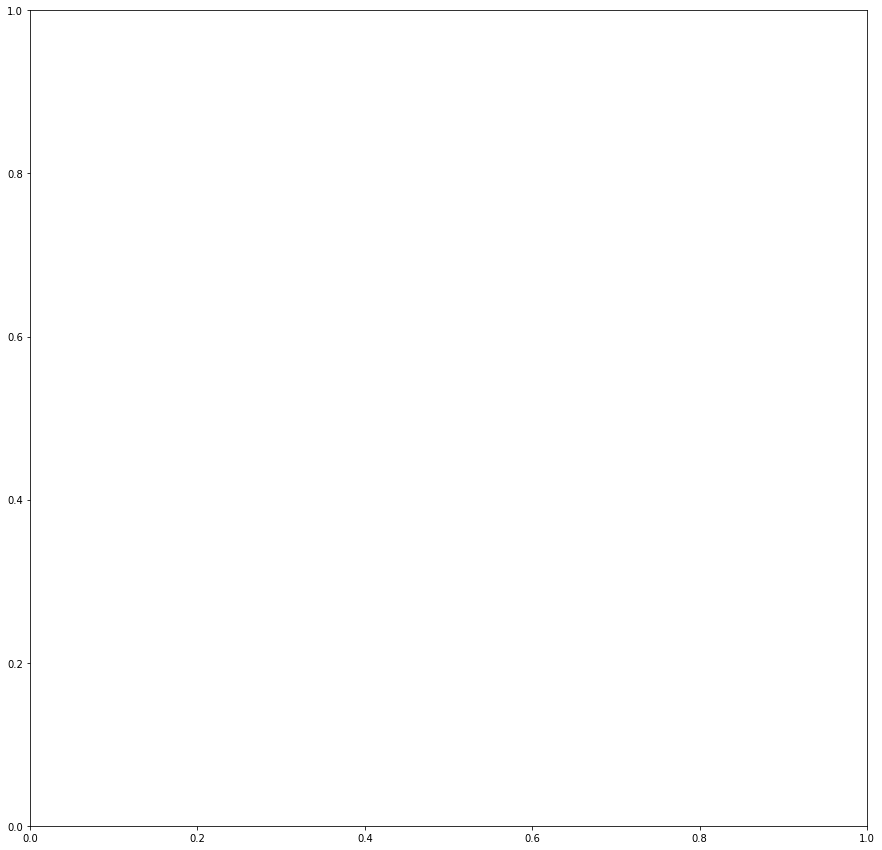

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from random import shuffle
num_sketches = 1
npy_files = glob.glob('server/larger_data/*')
shuffle(npy_files)
mx = 0 
max_count = 500  
min_count = 100 

def data_gen():
    global mx
    drawings = []
    
    cnt = 1 
    for file in npy_files:
        drawing = create_data(json.load(open(file))) 
        if len(drawing) < max_count and len(drawing) > min_count:
            drawings.append(drawing)    
            mx = max(len(drawing), mx)
            cnt += 1
        if cnt > num_sketches:
            break
    print(len(drawings))
    for drawing in drawings:
        if len(drawing) < mx:
            while len(drawing) < mx:
                drawing.append(drawing[-1])

    for i in range(mx):
        points = []
        for j in range(num_sketches):
            points.append(drawings[j][i])
        yield points

sqrt = int(math.sqrt(num_sketches))
fig, axes = plt.subplots(sqrt, sqrt, figsize=(15,15))

lines = []

for i in range(num_sketches):
    ax = axes[map_axes(i, num_sketches = num_sketches)]
    ax.set_ylim(600, 0)
    ax.set_xlim(0, 600)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal', adjustable='box')
    line, = ax.plot([], [], lw=2, color = 'k')
    lines.append(line) 
    
# initialize the data arrays 
line_data = [([], []) for _ in range(num_sketches)]

def run(data):
    global line_data, num_sketches
    for i in range(num_sketches):
        x, y, z = data[i]
        line_data[i][0].append(x)
        line_data[i][1].append(y)
        lines[i].set_data(line_data[i][0], line_data[i][1])
        if z == 1:
            line, = axes[map_axes(i, num_sketches = num_sketches)].plot([], [], lw=2, color = 'k')
            lines[i] = line
            line_data[i] = [[], []]

    return lines

ani = animation.FuncAnimation(fig, run, data_gen, interval=10, repeat=False, save_count=max_count)
d = ani.save(f'video.mp4', extra_args=['-vcodec', 'libx264'])

In [6]:
video = io.open('video.mp4', 'r+b').read()

encoded = base64.b64encode(video)
HTML(data='''<video alt="video" autoplay>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

In [54]:
%%capture 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from random import shuffle
num_sketches = 1

        
def save_video(drawing, mx):
    max_count = 1000  
    min_count = 100

    def data_gen():
        for point in drawing:
            yield point



    # initialize the data arrays 
    def run(point):
        global line_data, line
        x, y, z = point
        line_data[0].append(x)
        line_data[1].append(y)
        line.set_data(line_data[0], line_data[1])
        if z == 1:
            line, = ax.plot([], [], lw=2, color = 'k')
            line_data = ([], [])

        return line

    ani = animation.FuncAnimation(fig, run, data_gen, interval=10, repeat=False, save_count=mx)
    d = ani.save(f'video.mp4', extra_args=['-vcodec', 'libx264'])

In [55]:
cntr = 0
npy_files = glob.glob('server/larger_data/*.json')


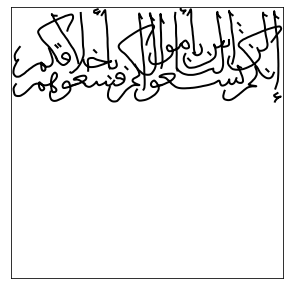

In [58]:
from IPython.core.display import display, HTML, Video

line_data = ([], [])
sqrt = int(math.sqrt(num_sketches))
fig, ax = plt.subplots(sqrt, sqrt, figsize=(5,5))
ax.set_ylim(600, 0)
ax.set_xlim(0, 600)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal', adjustable='box')
line, = ax.plot([], [], lw=2, color = 'k')
file = npy_files[cntr]
drawing = create_data(json.load(open(file)))
save_video(drawing, len(drawing))
video = io.open('video.mp4', 'r+b').read()
encoded = base64.b64encode(video)
cntr+=1
display(HTML(data='''<video alt="video" autoplay>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))

In [65]:
print([list(stroke.keys())[0] for stroke in json.load(open(file))])

['ا', 'ء', '.', 'ں', 'ﻛ', 'م', 'ل', '.', 'ں', '.', '.', 'ٮ', 'س', 'ع', 'و', 'ا', 'ا', 'ل', '.', 'ں', 'ا', 'س', 'ٮ', '.', 'ء', 'ا', 'م', 'و', 'ا', 'ل', 'ﻛ', 'م', '.', 'ٯ', 'س', 'ع', 'و', 'ه', 'م', 'ٮ', '.', 'ء', 'ا', '.', 'ح', 'ل', 'ا', '.', '.', 'ٯ', 'ﻛ', 'م']


In [66]:
display(HTML(data='''<video alt="video" autoplay>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))